In [1]:
#Importing Tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

C:\Users\Learnly\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


In [3]:
# Import Datasets

In [4]:
boston_housing = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [5]:
print('Training set shape: ', train_data.shape)
print('Test set shape: ', test_data.shape)

Training set shape:  (404, 13)
Test set shape:  (102, 13)


In [6]:
random_array = np.random.random(train_labels.shape)
print(random_array)

[4.78203655e-01 5.70790383e-01 3.42391094e-02 8.63161651e-01
 9.71881697e-01 1.56042724e-01 5.59225706e-01 5.55180687e-02
 5.98522866e-01 3.46704151e-01 8.71590680e-02 3.71627572e-01
 9.13140045e-01 6.97631975e-01 4.69562247e-02 3.69900116e-01
 4.10298685e-01 5.28630575e-01 5.73697254e-02 9.85983735e-01
 3.60954159e-01 7.16586852e-01 8.76936360e-01 6.86517201e-01
 4.48333697e-01 5.86846415e-02 2.68260775e-01 6.21301591e-01
 9.55253527e-01 8.99434890e-01 2.84032570e-01 6.53041518e-01
 4.79972174e-01 5.78180143e-01 6.59409441e-01 1.40758642e-01
 3.10866018e-01 6.98291871e-01 1.76201473e-01 4.11907880e-01
 8.19801593e-01 7.62222899e-01 5.15702672e-01 9.34269510e-01
 3.04078796e-01 1.89372615e-02 6.44356572e-01 1.57938034e-01
 2.65208225e-02 9.93651750e-01 2.34070392e-01 8.69167076e-01
 8.59229288e-01 2.30109418e-01 3.49112303e-01 4.22287769e-01
 6.04144702e-01 2.60028559e-01 1.36336064e-03 9.95423685e-01
 7.01597043e-01 5.68567539e-01 1.17265124e-01 6.79138410e-02
 8.46408981e-01 7.123249

In [7]:
print(len(random_array))

404


In [8]:
order = np.argsort(random_array)
print(len(order))

404


In [9]:
train_data = train_data[order]
train_labels = train_labels[order]

In [10]:
#Features

In [11]:
print(train_data[0])

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [12]:
import pandas as pd
df = pd.DataFrame(train_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [13]:
print(train_labels[:10])

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [14]:
#Feature Scaling

In [15]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [16]:
#Building Model

In [17]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation = tf.nn.relu,
                          input_shape = (train_data.shape[1],)),
        keras.layers.Dense(64, activation = tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    model.compile(loss = 'mse',
                  optimizer = tf.train.RMSPropOptimizer(0.001),
                  metrics=['mae'])
    
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Train Model

In [19]:
history = model.fit(train_data, train_labels, epochs = 500,
                   validation_split=0.2)

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 0s 524us/step - loss: 531.1173 - mean_absolute_error: 21.1303 - val_loss: 543.3690 - val_mean_absolute_error: 21.5354
Epoch 2/500
323/323 [==============================] - 0s 37us/step - loss: 469.9661 - mean_absolute_error: 19.7012 - val_loss: 469.2518 - val_mean_absolute_error: 19.8534
Epoch 3/500
323/323 [==============================] - 0s 34us/step - loss: 394.8274 - mean_absolute_error: 17.8314 - val_loss: 381.4494 - val_mean_absolute_error: 17.6868
Epoch 4/500
323/323 [==============================] - 0s 50us/step - loss: 310.7403 - mean_absolute_error: 15.5273 - val_loss: 286.0347 - val_mean_absolute_error: 15.0142
Epoch 5/500
323/323 [==============================] - 0s 34us/step - loss: 222.6067 - mean_absolute_error: 12.8310 - val_loss: 188.2372 - val_mean_absolute_error: 11.7317
Epoch 6/500
323/323 [==============================] - 0s 37us/step - loss: 141.7698 - mean_ab

323/323 [==============================] - 0s 34us/step - loss: 7.8417 - mean_absolute_error: 2.0374 - val_loss: 17.3077 - val_mean_absolute_error: 2.7661
Epoch 50/500
323/323 [==============================] - 0s 31us/step - loss: 7.7558 - mean_absolute_error: 2.0065 - val_loss: 17.6304 - val_mean_absolute_error: 2.8150
Epoch 51/500
323/323 [==============================] - 0s 34us/step - loss: 7.7589 - mean_absolute_error: 2.0183 - val_loss: 16.9576 - val_mean_absolute_error: 2.7654
Epoch 52/500
323/323 [==============================] - 0s 37us/step - loss: 7.4748 - mean_absolute_error: 2.0241 - val_loss: 18.8257 - val_mean_absolute_error: 2.8615
Epoch 53/500
323/323 [==============================] - 0s 37us/step - loss: 7.7673 - mean_absolute_error: 1.9839 - val_loss: 17.3632 - val_mean_absolute_error: 2.8165
Epoch 54/500
323/323 [==============================] - 0s 37us/step - loss: 7.5168 - mean_absolute_error: 2.0094 - val_loss: 16.7457 - val_mean_absolute_error: 2.7686
Epoch

Epoch 98/500
323/323 [==============================] - 0s 31us/step - loss: 5.4631 - mean_absolute_error: 1.6870 - val_loss: 16.1635 - val_mean_absolute_error: 2.7308
Epoch 99/500
323/323 [==============================] - 0s 34us/step - loss: 5.5083 - mean_absolute_error: 1.7429 - val_loss: 16.4895 - val_mean_absolute_error: 2.7415
Epoch 100/500
323/323 [==============================] - 0s 31us/step - loss: 5.6575 - mean_absolute_error: 1.7274 - val_loss: 15.3101 - val_mean_absolute_error: 2.6202
Epoch 101/500
323/323 [==============================] - 0s 31us/step - loss: 5.4738 - mean_absolute_error: 1.6969 - val_loss: 15.9204 - val_mean_absolute_error: 2.6988
Epoch 102/500
323/323 [==============================] - 0s 31us/step - loss: 5.3266 - mean_absolute_error: 1.7028 - val_loss: 17.1203 - val_mean_absolute_error: 2.8257
Epoch 103/500
323/323 [==============================] - 0s 31us/step - loss: 5.5571 - mean_absolute_error: 1.7175 - val_loss: 14.5560 - val_mean_absolute_er

323/323 [==============================] - 0s 34us/step - loss: 4.2042 - mean_absolute_error: 1.4823 - val_loss: 13.7496 - val_mean_absolute_error: 2.4774
Epoch 147/500
323/323 [==============================] - 0s 37us/step - loss: 4.1441 - mean_absolute_error: 1.4831 - val_loss: 13.5966 - val_mean_absolute_error: 2.4332
Epoch 148/500
323/323 [==============================] - 0s 31us/step - loss: 4.2449 - mean_absolute_error: 1.4819 - val_loss: 14.1774 - val_mean_absolute_error: 2.4753
Epoch 149/500
323/323 [==============================] - 0s 34us/step - loss: 4.2416 - mean_absolute_error: 1.5012 - val_loss: 15.6631 - val_mean_absolute_error: 2.6973
Epoch 150/500
323/323 [==============================] - 0s 74us/step - loss: 4.1214 - mean_absolute_error: 1.4927 - val_loss: 13.9965 - val_mean_absolute_error: 2.4738
Epoch 151/500
323/323 [==============================] - 0s 34us/step - loss: 4.1681 - mean_absolute_error: 1.4774 - val_loss: 14.4327 - val_mean_absolute_error: 2.5136


323/323 [==============================] - 0s 34us/step - loss: 3.5777 - mean_absolute_error: 1.3692 - val_loss: 13.3957 - val_mean_absolute_error: 2.3410
Epoch 195/500
323/323 [==============================] - 0s 37us/step - loss: 3.3459 - mean_absolute_error: 1.3208 - val_loss: 13.7893 - val_mean_absolute_error: 2.5121
Epoch 196/500
323/323 [==============================] - 0s 34us/step - loss: 3.5021 - mean_absolute_error: 1.3781 - val_loss: 13.3753 - val_mean_absolute_error: 2.3926
Epoch 197/500
323/323 [==============================] - 0s 46us/step - loss: 3.2088 - mean_absolute_error: 1.3081 - val_loss: 14.5702 - val_mean_absolute_error: 2.5746
Epoch 198/500
323/323 [==============================] - 0s 34us/step - loss: 3.2853 - mean_absolute_error: 1.3516 - val_loss: 13.8463 - val_mean_absolute_error: 2.4308
Epoch 199/500
323/323 [==============================] - 0s 37us/step - loss: 3.2839 - mean_absolute_error: 1.3203 - val_loss: 16.0842 - val_mean_absolute_error: 2.6361


323/323 [==============================] - 0s 31us/step - loss: 2.6593 - mean_absolute_error: 1.1836 - val_loss: 14.1318 - val_mean_absolute_error: 2.5214
Epoch 243/500
323/323 [==============================] - 0s 37us/step - loss: 2.7221 - mean_absolute_error: 1.2168 - val_loss: 12.4967 - val_mean_absolute_error: 2.2663
Epoch 244/500
323/323 [==============================] - 0s 34us/step - loss: 2.8031 - mean_absolute_error: 1.2187 - val_loss: 12.8429 - val_mean_absolute_error: 2.3349
Epoch 245/500
323/323 [==============================] - 0s 31us/step - loss: 2.7236 - mean_absolute_error: 1.2162 - val_loss: 14.4239 - val_mean_absolute_error: 2.4843
Epoch 246/500
323/323 [==============================] - 0s 34us/step - loss: 2.7696 - mean_absolute_error: 1.2207 - val_loss: 14.7587 - val_mean_absolute_error: 2.5325
Epoch 247/500
323/323 [==============================] - 0s 34us/step - loss: 2.6381 - mean_absolute_error: 1.1739 - val_loss: 13.1195 - val_mean_absolute_error: 2.3118


323/323 [==============================] - 0s 37us/step - loss: 2.2955 - mean_absolute_error: 1.1283 - val_loss: 14.0585 - val_mean_absolute_error: 2.5533
Epoch 291/500
323/323 [==============================] - 0s 31us/step - loss: 2.1806 - mean_absolute_error: 1.0753 - val_loss: 12.9243 - val_mean_absolute_error: 2.3084
Epoch 292/500
323/323 [==============================] - 0s 31us/step - loss: 2.1525 - mean_absolute_error: 1.0541 - val_loss: 16.2953 - val_mean_absolute_error: 2.9027
Epoch 293/500
323/323 [==============================] - 0s 34us/step - loss: 2.5239 - mean_absolute_error: 1.1978 - val_loss: 13.7238 - val_mean_absolute_error: 2.5011
Epoch 294/500
323/323 [==============================] - 0s 31us/step - loss: 2.1642 - mean_absolute_error: 1.0782 - val_loss: 13.5770 - val_mean_absolute_error: 2.3908
Epoch 295/500
323/323 [==============================] - 0s 34us/step - loss: 2.2265 - mean_absolute_error: 1.1096 - val_loss: 13.0763 - val_mean_absolute_error: 2.3655


323/323 [==============================] - 0s 31us/step - loss: 1.7764 - mean_absolute_error: 0.9559 - val_loss: 13.2785 - val_mean_absolute_error: 2.4025
Epoch 339/500
323/323 [==============================] - 0s 31us/step - loss: 1.8930 - mean_absolute_error: 1.0022 - val_loss: 12.8303 - val_mean_absolute_error: 2.2802
Epoch 340/500
323/323 [==============================] - 0s 37us/step - loss: 1.9117 - mean_absolute_error: 0.9825 - val_loss: 13.0144 - val_mean_absolute_error: 2.3220
Epoch 341/500
323/323 [==============================] - 0s 31us/step - loss: 1.8120 - mean_absolute_error: 0.9689 - val_loss: 14.5178 - val_mean_absolute_error: 2.6250
Epoch 342/500
323/323 [==============================] - 0s 34us/step - loss: 2.0116 - mean_absolute_error: 1.0362 - val_loss: 13.4589 - val_mean_absolute_error: 2.4010
Epoch 343/500
323/323 [==============================] - 0s 31us/step - loss: 1.8460 - mean_absolute_error: 0.9796 - val_loss: 12.9742 - val_mean_absolute_error: 2.3605


323/323 [==============================] - 0s 37us/step - loss: 1.6359 - mean_absolute_error: 0.9418 - val_loss: 14.1797 - val_mean_absolute_error: 2.5687
Epoch 387/500
323/323 [==============================] - 0s 37us/step - loss: 1.5829 - mean_absolute_error: 0.9026 - val_loss: 14.0460 - val_mean_absolute_error: 2.5504
Epoch 388/500
323/323 [==============================] - 0s 37us/step - loss: 1.6410 - mean_absolute_error: 0.9013 - val_loss: 12.7311 - val_mean_absolute_error: 2.2814
Epoch 389/500
323/323 [==============================] - 0s 34us/step - loss: 1.7583 - mean_absolute_error: 0.9267 - val_loss: 13.7410 - val_mean_absolute_error: 2.4160
Epoch 390/500
323/323 [==============================] - 0s 34us/step - loss: 1.6290 - mean_absolute_error: 0.9191 - val_loss: 13.8621 - val_mean_absolute_error: 2.4726
Epoch 391/500
323/323 [==============================] - 0s 37us/step - loss: 1.6958 - mean_absolute_error: 0.9514 - val_loss: 14.2977 - val_mean_absolute_error: 2.4837


323/323 [==============================] - 0s 37us/step - loss: 1.4024 - mean_absolute_error: 0.8472 - val_loss: 13.4129 - val_mean_absolute_error: 2.4393
Epoch 435/500
323/323 [==============================] - 0s 34us/step - loss: 1.5567 - mean_absolute_error: 0.8872 - val_loss: 13.1550 - val_mean_absolute_error: 2.3528
Epoch 436/500
323/323 [==============================] - 0s 40us/step - loss: 1.3789 - mean_absolute_error: 0.8264 - val_loss: 13.2224 - val_mean_absolute_error: 2.4080
Epoch 437/500
323/323 [==============================] - 0s 34us/step - loss: 1.2974 - mean_absolute_error: 0.8188 - val_loss: 13.2113 - val_mean_absolute_error: 2.3945
Epoch 438/500
323/323 [==============================] - 0s 34us/step - loss: 1.4463 - mean_absolute_error: 0.8672 - val_loss: 13.3453 - val_mean_absolute_error: 2.4361
Epoch 439/500
323/323 [==============================] - 0s 34us/step - loss: 1.4521 - mean_absolute_error: 0.8817 - val_loss: 14.1389 - val_mean_absolute_error: 2.5138


323/323 [==============================] - 0s 31us/step - loss: 1.3315 - mean_absolute_error: 0.8085 - val_loss: 13.8343 - val_mean_absolute_error: 2.4898
Epoch 483/500
323/323 [==============================] - 0s 37us/step - loss: 1.2067 - mean_absolute_error: 0.7827 - val_loss: 13.8105 - val_mean_absolute_error: 2.5217
Epoch 484/500
323/323 [==============================] - 0s 84us/step - loss: 1.2065 - mean_absolute_error: 0.7626 - val_loss: 14.1470 - val_mean_absolute_error: 2.5247
Epoch 485/500
323/323 [==============================] - 0s 37us/step - loss: 1.2080 - mean_absolute_error: 0.7774 - val_loss: 13.7175 - val_mean_absolute_error: 2.4433
Epoch 486/500
323/323 [==============================] - 0s 34us/step - loss: 1.2553 - mean_absolute_error: 0.8092 - val_loss: 14.6757 - val_mean_absolute_error: 2.6161
Epoch 487/500
323/323 [==============================] - 0s 37us/step - loss: 1.3501 - mean_absolute_error: 0.8363 - val_loss: 14.3655 - val_mean_absolute_error: 2.5694


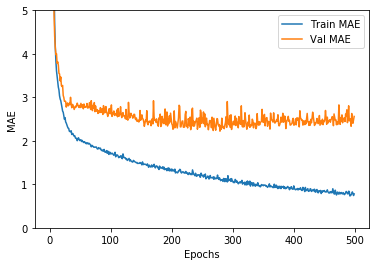

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.plot(history.epoch,
            np.array(history.history['mean_absolute_error']), label = 'Train MAE')
    
    plt.plot(history.epoch,
            np.array(history.history['val_mean_absolute_error']), label = 'Val MAE')
    plt.legend()
    plt.ylim([0,5])
    return 

plot_history(history)

In [21]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)

history = model.fit(train_data,train_labels, epochs=500,validation_split=0.2, callbacks=[early_stop])

Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 0s 570us/step - loss: 532.3231 - mean_absolute_error: 21.2543 - val_loss: 538.8341 - val_mean_absolute_error: 21.5500
Epoch 2/500
323/323 [==============================] - 0s 34us/step - loss: 472.5265 - mean_absolute_error: 19.8687 - val_loss: 474.8057 - val_mean_absolute_error: 20.0468
Epoch 3/500
323/323 [==============================] - 0s 43us/step - loss: 406.5722 - mean_absolute_error: 18.2158 - val_loss: 393.4692 - val_mean_absolute_error: 18.0200
Epoch 4/500
323/323 [==============================] - 0s 40us/step - loss: 326.3231 - mean_absolute_error: 16.0169 - val_loss: 302.8046 - val_mean_absolute_error: 15.4741
Epoch 5/500
323/323 [==============================] - 0s 37us/step - loss: 243.4334 - mean_absolute_error: 13.4598 - val_loss: 213.4081 - val_mean_absolute_error: 12.4107
Epoch 6/500
323/323 [==============================] - 0s 37us/step - loss: 168.8665 - mean_ab

323/323 [==============================] - 0s 40us/step - loss: 7.8528 - mean_absolute_error: 2.0141 - val_loss: 17.4424 - val_mean_absolute_error: 2.8237
Epoch 50/500
323/323 [==============================] - 0s 37us/step - loss: 7.6188 - mean_absolute_error: 2.0157 - val_loss: 19.9134 - val_mean_absolute_error: 2.9997
Epoch 51/500
323/323 [==============================] - 0s 31us/step - loss: 7.8134 - mean_absolute_error: 2.0400 - val_loss: 18.3360 - val_mean_absolute_error: 2.9527
Epoch 52/500
323/323 [==============================] - 0s 37us/step - loss: 7.9707 - mean_absolute_error: 2.0959 - val_loss: 17.1971 - val_mean_absolute_error: 2.8095
Epoch 53/500
323/323 [==============================] - 0s 28us/step - loss: 7.5418 - mean_absolute_error: 1.9897 - val_loss: 17.7789 - val_mean_absolute_error: 2.8468
Epoch 54/500
323/323 [==============================] - 0s 31us/step - loss: 7.3745 - mean_absolute_error: 1.9626 - val_loss: 17.4100 - val_mean_absolute_error: 2.8660
Epoch

Epoch 98/500
323/323 [==============================] - 0s 31us/step - loss: 5.8242 - mean_absolute_error: 1.7719 - val_loss: 15.4739 - val_mean_absolute_error: 2.7058
Epoch 99/500
323/323 [==============================] - 0s 40us/step - loss: 5.8759 - mean_absolute_error: 1.7543 - val_loss: 16.0568 - val_mean_absolute_error: 2.8113
Epoch 100/500
323/323 [==============================] - 0s 34us/step - loss: 6.0336 - mean_absolute_error: 1.8099 - val_loss: 15.1953 - val_mean_absolute_error: 2.7113
Epoch 101/500
323/323 [==============================] - 0s 34us/step - loss: 5.5419 - mean_absolute_error: 1.7398 - val_loss: 16.1956 - val_mean_absolute_error: 2.7636
Epoch 102/500
323/323 [==============================] - 0s 34us/step - loss: 5.7744 - mean_absolute_error: 1.7430 - val_loss: 15.9329 - val_mean_absolute_error: 2.8100
Epoch 103/500
323/323 [==============================] - 0s 37us/step - loss: 5.9615 - mean_absolute_error: 1.8035 - val_loss: 17.2518 - val_mean_absolute_er

323/323 [==============================] - 0s 37us/step - loss: 4.7483 - mean_absolute_error: 1.6225 - val_loss: 16.1425 - val_mean_absolute_error: 2.7556
Epoch 147/500
323/323 [==============================] - 0s 34us/step - loss: 4.7443 - mean_absolute_error: 1.5902 - val_loss: 14.7039 - val_mean_absolute_error: 2.6555
Epoch 148/500
323/323 [==============================] - 0s 37us/step - loss: 4.6873 - mean_absolute_error: 1.6105 - val_loss: 15.6049 - val_mean_absolute_error: 2.6963
Epoch 149/500
323/323 [==============================] - 0s 31us/step - loss: 4.7738 - mean_absolute_error: 1.6499 - val_loss: 14.6636 - val_mean_absolute_error: 2.6781
Epoch 150/500
323/323 [==============================] - 0s 37us/step - loss: 4.6021 - mean_absolute_error: 1.6070 - val_loss: 14.7234 - val_mean_absolute_error: 2.6184
Epoch 151/500
323/323 [==============================] - 0s 37us/step - loss: 4.5684 - mean_absolute_error: 1.5557 - val_loss: 14.4303 - val_mean_absolute_error: 2.5733


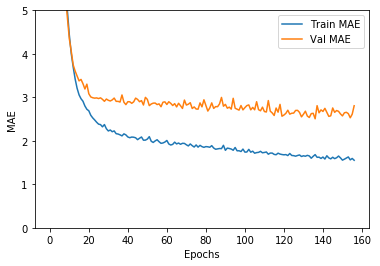

In [22]:
plot_history(history)

In [23]:
[loss, mae] = model.evaluate(test_data,test_labels)

print('MAE for Test set: ', mae * 1000)

102/102 [==============================] - 0s 39us/step
MAE for Test set:  2870.558402117561


In [24]:
predictions = model.predict(test_data).flatten()

Text(0,0.5,'Predicted Values')

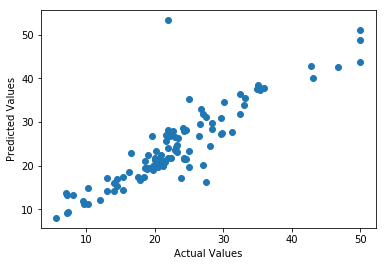

In [25]:
plt.scatter(test_labels,predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0,0.5,'Count')

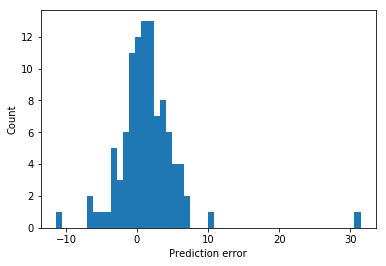

In [26]:
error = predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel('Prediction error')
plt.ylabel('Count')